In [1]:
import torch
import numpy as np
from matplotlib import pyplot as plt
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
import torch.nn.functional as F
import os 
from torch import nn
from torch.utils.data import Dataset
import gzip
import pandas as pd
# import torchsummary

In [2]:
trans = transforms.Compose([transforms.ToTensor(), 
                            transforms.Normalize((0.1307,), (0.3081,))])

In [3]:
# def load_data(data_folder, data_name, label_name):
#     with gzip.open(os.path.join(data_folder,data_name), 'rb') as imgpath:
#         x_train = np.frombuffer(imgpath.read(), np.uint8, offset=16).reshape(len(y_train), 28, 28)
#     with gzip.open(os.path.join(data_folder,label_name), 'rb') as lbpath: 
#         y_train = np.frombuffer(lbpath.read(), np.uint8, offset=8)
#     return (x_train, y_train)


# class MNISTDataset(Dataset):
#     def __init__(self, data_folder, data_name, label_name,transform=None):
#         (train_set, train_labels) = load_data(data_folder, data_name, label_name) # 其实也可以直接使用torch.load(),读取之后的结果为torch.Tensor形式
#         self.train_set = train_set
#         self.train_labels = train_labels
#         self.transform = transform

#     def __getitem__(self, index):
#         img, target = self.train_set[index], int(self.train_labels[index])
#         if self.transform is not None:
#             img = self.transform(img)
#         return img, target

#     def __len__(self):
#         return len(self.train_set)

In [4]:
# class MNISTDataset(Dataset):
#     def __init__(self, data_folder, data_name, label_name,transform=None):
#         with gzip.open(os.path.join(data_folder,label_name), 'rb') as lbpath:
#             train_labels = np.frombuffer(lbpath.read(), np.uint8, offset=8)
#         with gzip.open(os.path.join(data_folder,data_name), 'rb') as imgpath: 
#             train_set = np.frombuffer(imgpath.read(), np.uint8, offset=16).reshape(len(train_labels), 28, 28)
#         self.train_set = train_set
#         self.train_labels = train_labels
#         self.transform = transform
#     def __getitem__(self, index):
#         img = self.train_set[index]
#         target = int(self.train_labels[index])
#         if self.transform is not None:
#             img = self.transform(img)
#         return img, target

#     def __len__(self):
#         return len(self.train_set)

# class MNISTDataset(Dataset):
#     def __init__(self, data_folder, data_name, label_name,transform=None):
#         with open(os.path.join(data_folder,label_name), 'rb') as lbpath:
#             train_labels = np.frombuffer(lbpath.read(), np.uint8, offset=8)
#         with open(os.path.join(data_folder,data_name), 'rb') as imgpath: 
#             train_set = np.frombuffer(imgpath.read(), np.uint8, offset=16).reshape(len(train_labels), 28, 28)
#         self.train_set = train_set
#         self.train_labels = train_labels
#         self.transform = transform
#     def __getitem__(self, index):
#         img = self.train_set[index]
#         target = int(self.train_labels[index])
#         if self.transform is not None:
#             img = self.transform(img)
#         return img, target

#     def __len__(self):
#         return len(self.train_set)
    
class Fasion_Mnist(Dataset):
    def __init__(self, csv_path, transform=None):
        data = pd.read_csv(csv_path)       
        label = data.iloc[:, 0].values
        train_set = data.iloc[:, 1:].values.astype(np.uint8).reshape(len(label), 28, 28)
        # train_set /= 255.0 
       
        self.train_set = train_set
        self.train_label = label
        self.transform = transform
    
    def __getitem__(self, index):
        img = self.train_set[index]
        target = int(self.train_label[index])
        if self.transform is not None:
            img = self.transform(img)
        target = torch.tensor(target, dtype=torch.long)
        #有个问题，以前没有怎么能用呢？
        return img, target
    def __len__(self):
        return len(self.train_set)

In [5]:
# train_dataset = MNISTDataset(r"C:\Users\14282\OneDrive\桌面\fasion_mnist", "train-images-idx3-ubyte", "train-labels-idx1-ubyte", transform=trans)
# test_dataset = MNISTDataset(r"C:\Users\14282\OneDrive\桌面\fasion_mnist", "train-images-idx3-ubyte", "train-labels-idx1-ubyte", transform=trans)
train_dataset = Fasion_Mnist(r"C:\Users\14282\OneDrive\桌面\fasion_mnist\fashion-mnist_train.csv", transform=trans)
# import pdb; pdb.set_trace() 
test_dataset = Fasion_Mnist(r"C:\Users\14282\OneDrive\桌面\fasion_mnist\fashion-mnist_test.csv", transform=trans)

In [6]:
batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# import pdb; pdb.set_trace() 
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [7]:
# # Get the first batch of data
# dataiter = iter(train_loader)
# images, labels = next(dataiter)
# # for batch_idx, data in enumerate(train_loader, 0):
# #     inputs, target = data
# #     print(batch_idx)
# for batch_idx, x in enumerate(train_loader):
#     inputs, targets = x
#     # a = x
#     print(batch_idx)
# #     print(f"Batch {batch_idx}: data = {data}, target = {target}")
# import pdb; pdb.set_trace() 
# # Plot the images

# fig, axes = plt.subplots(figsize=(10,4), ncols=5)
# for i in range(5):
#     ax = axes[i]
#     img = np.squeeze(images[i])
#     ax.imshow(img, cmap='gray')
#     ax.set_title(f"Label: {labels[i]}")
#     ax.axis('off')
# plt.show()

In [8]:
# batch_size = 64
learning_rate = 0.01
momentum = 0.5
EPOCH = 20

In [9]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 6, kernel_size=3),
            torch.nn.MaxPool2d(kernel_size=2)
        )
        self.conv2 = torch.nn.Sequential(
            torch.nn.Conv2d(6, 16, kernel_size=3),
            torch.nn.MaxPool2d(2,2),
        )
        self.fc = torch.nn.Sequential(
            torch.nn.Linear(400, 120),
            torch.nn.Linear(120, 84),
            torch.nn.Linear(84, 10)
        )

    def forward(self, x):
        batch_size = x.size(0)
        x = self.conv1(x)  
        x = self.conv2(x)  
        x = x.view(batch_size, -1) 
        x = self.fc(x)
        return x  

model = Net()

# torchsummary.summary(model, (1, 28, 28))

In [10]:
criterion = torch.nn.CrossEntropyLoss()  

In [11]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [12]:
def train(epoch):
    running_loss = 0.0  
    running_total = 0
    running_correct = 0
    for batch_idx, data in enumerate(train_loader, 0):
        inputs, target = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, target)
        loss.backward()
        optimizer.step()
    
        running_loss += loss.item()
        
        
        # import pdb; pdb.set_trace()
        
        _, predicted = torch.max(outputs.data, dim=1)
        #detach()方法
        running_total += inputs.shape[0]
        running_correct += (predicted == target).sum().item()        
        
        if batch_idx % 300 == 299:
            print(f'[{epoch + 1}, {batch_idx + 1:5d}]: loss: {running_loss / 300:.3f}, acc: {100 * running_correct / running_total:.2f}%')
            running_loss = 0.0  
            running_total = 0
            running_correct = 0  

In [13]:
def test():
    correct = 0
    total = 0
    with torch.no_grad():  # 测试集不用算梯度
        for data in test_loader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, dim=1)  # dim = 1 列是第0个维度，行是第1个维度，沿着行(第1个维度)去找1.最大值和2.最大值的下标
            total += labels.size(0)  # 张量之间的比较运算
            correct += (predicted == labels).sum().item()
    acc = correct / total
    
    return acc

[1,   300]: loss: 1.123, acc: 61.69%
[2,   300]: loss: 0.579, acc: 78.85%
[3,   300]: loss: 0.518, acc: 81.17%
[4,   300]: loss: 0.492, acc: 82.47%
[5,   300]: loss: 0.454, acc: 83.97%
[6,   300]: loss: 0.442, acc: 84.49%
[7,   300]: loss: 0.419, acc: 85.19%
[8,   300]: loss: 0.404, acc: 85.95%
[9,   300]: loss: 0.394, acc: 86.26%
[10,   300]: loss: 0.377, acc: 86.79%
[11,   300]: loss: 0.373, acc: 86.90%
[12,   300]: loss: 0.368, acc: 87.26%
[13,   300]: loss: 0.355, acc: 87.71%
[14,   300]: loss: 0.356, acc: 87.61%
[15,   300]: loss: 0.346, acc: 87.79%
[16,   300]: loss: 0.341, acc: 88.03%
[17,   300]: loss: 0.337, acc: 88.18%
[18,   300]: loss: 0.335, acc: 88.13%
[19,   300]: loss: 0.331, acc: 88.49%
[20,   300]: loss: 0.325, acc: 88.70%


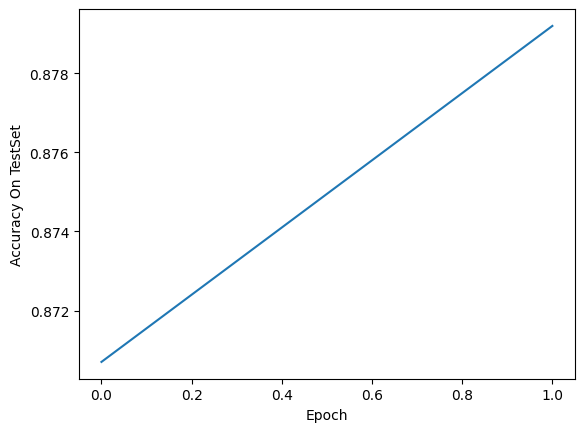

In [14]:
if __name__ == '__main__':
    acc_list_test = []
    for epoch in range(EPOCH):
        train(epoch)
        if epoch % 10 == 9:  #每训练10轮 测试1次
            acc_test = test()
            acc_list_test.append(acc_test)

    plt.plot(acc_list_test)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy On TestSet')
    plt.show()

In [15]:
save_path = './Net.pth'
torch.save(model.state_dict(), save_path)

In [16]:
import numpy as np
from PIL import Image
import torch
from torchvision import transforms


transforms = transforms.Compose([
    transforms.Resize((28,28)),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(), 
    transforms.Normalize((0.1307,), (0.3081,))])

img = Image.open(r"C:\Users\14282\OneDrive\桌面\number\数字1.png").convert('L')
img = transforms(img)

model = Net()

model.load_state_dict(torch.load('Net.pth'))

with torch.no_grad():
    output = model(img)
#     import pdb; pdb.set_trace()
    prediction = torch.argmax(output, dim=1)
print("预测结果：", prediction.item())

预测结果： 8
